In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')



# ANÁLISIS 

Cargo los datos:

#### Para este análisis se utilizarán los datos de Yelp, ya que son los más relevantes y se relacionan más con los objetivos planteados.

Extraigo los datos:

In [202]:
# YELP
yelp_restaurants= pd.read_csv('POST_ETL_DATASETS/Yelp_Data/yelp_restaurants.csv')
yelp_reviews= pd.read_csv('POST_ETL_DATASETS/Yelp_Data/yelp_reviews.csv')
yelp_users= pd.read_csv('POST_ETL_DATASETS/Yelp_Data/yelp_users.csv')
cities=  pd.read_csv('POST_ETL_DATASETS/Yelp_Data/cities.csv')

__________________________________________________________________________________________________________________________

### Panorama general de reviews

In [203]:
print(yelp_reviews.info())
yelp_reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525475 entries, 0 to 525474
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    525475 non-null  object
 1   user_id      525475 non-null  object
 2   business_id  525475 non-null  object
 3   stars        525475 non-null  int64 
 4   text         525475 non-null  object
 5   date         525475 non-null  object
dtypes: int64(1), object(5)
memory usage: 24.1+ MB
None


,stars
count,525475.000000
mean,3.891196
std,1.458892
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


De lo anterior:
* La desviación estándar sugiere una dispersión moderada de las calificaciones respecto a la media. Eso puede significar que suelen haber algunas calificaciones o muy bajas o muy altas.
* El promedio es alto, casi de 4 estrellas. Además, a partir del segundo cuartil , la ocurrencia de 5 estrellas suele ser representativa. Esto avala el punto anterior.

Para verlo más a detalle, graficamos la evolución en el tiempo del promedio mensual de cantidad de reviews totales por año:

In [204]:
yelp_reviews.date.max()

'2022-01-19'

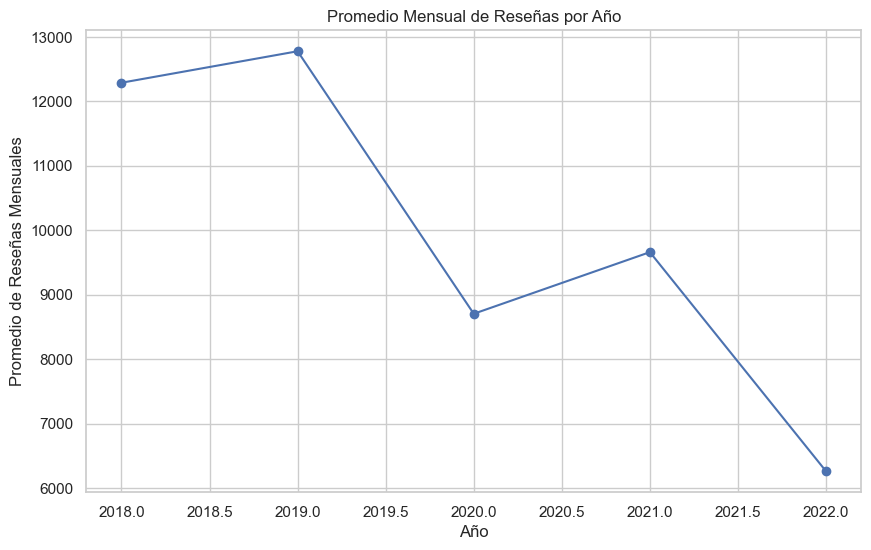

In [205]:
# Convertir la columna 'date' a tipo datetime
yelp_reviews['date'] = pd.to_datetime(yelp_reviews['date'])

# Crear una columna para el año y el mes
yelp_reviews['year'] = yelp_reviews['date'].dt.year
yelp_reviews['month'] = yelp_reviews['date'].dt.month

# Calcular el promedio mensual de reseñas por año
average_reviews_per_month = yelp_reviews.groupby(['year', 'month'])['review_id'].count().groupby('year').median()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(average_reviews_per_month.index, average_reviews_per_month.values, marker='o')

plt.title('Promedio Mensual de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Reseñas Mensuales')
plt.xticks()  # Colocar los años de interés en el eje X
plt.grid(True)
plt.show()



De lo anterior:
* El promedio mensual de reviews por año teniendo en cuenta a todos los restaurantes venía en subida entre el 2018 y 2019. Sin embargo, es lógico que en el 2020 haya disminuido considerablemente teniendo en cuenta la pandemia. A partir de este punto, se puede observar un intento de recuperación para el 2021, decreciendo nuevamente en el 2022. Sin embargo, este último decrecimiento puede tener que ver con que solo se está considerando los primeros 19 días del mes de enero del 2022.
* Conviene hacer un gráfico más detallado (cantidad por mes), para visualizar mejor la evolución:


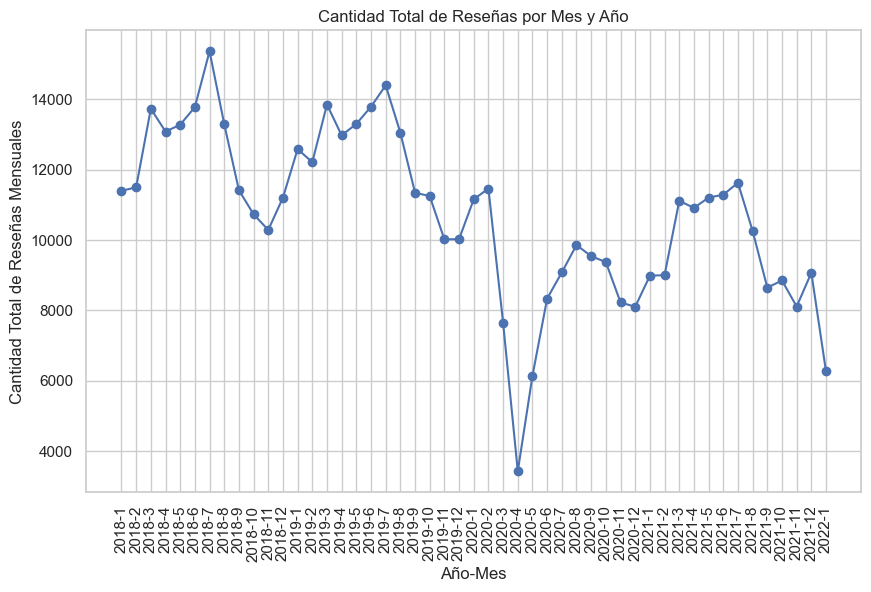

In [206]:
# Convertir la columna 'date' a tipo datetime
yelp_reviews['date'] = pd.to_datetime(yelp_reviews['date'])

# Crear una columna para el año y el mes
yelp_reviews['year'] = yelp_reviews['date'].dt.year
yelp_reviews['month'] = yelp_reviews['date'].dt.month


# Calcular la cantidad total de reseñas por mes y año
total_reviews_per_month = yelp_reviews.groupby(['year', 'month'])['review_id'].count()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(total_reviews_per_month.index.map(lambda x: f"{x[0]}-{x[1]}"), total_reviews_per_month.values, marker='o')

plt.title('Cantidad Total de Reseñas por Mes y Año')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Total de Reseñas Mensuales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


De lo anterior:
* Se confirma el descenso entre los años 2019 y 2020, siendo más específicos entre el periodo 2020-02 y 2020-03, coincidiendo exactamente con el inicio de la pandemia.
* Se observa también que, en general, la cantidad de reviews aún no se ha recuperado después de la pandemia a como estaba antes de ella; si bien ha aumentado nuevamente.
* El patrón por año suele ser el siguiente: enero suele ser un punto bajo/medio, va aumentando hasta llegar a su punto máximo del año en el mes de julio, para llegar a sus puntos más bajos en noviembre y diciembre, y aumentar ligeramente para enero, y así comenzar de nuevo el ciclo.
* Conviene graficar la evolución de solo el restaurante de nuestro cliente:

In [207]:
cliente=yelp_restaurants[yelp_restaurants["business_id"]=="3Wy21heeDm8h2tSZfcj6OA"]
cliente.categories.iloc[0]

"['Breakfast & Brunch', ' Food', ' Beer', ' Wine & Spirits', ' Bars', ' Seafood', ' Restaurants', ' Wine Bars', ' Cocktail Bars', ' American (New)', ' Nightlife']"

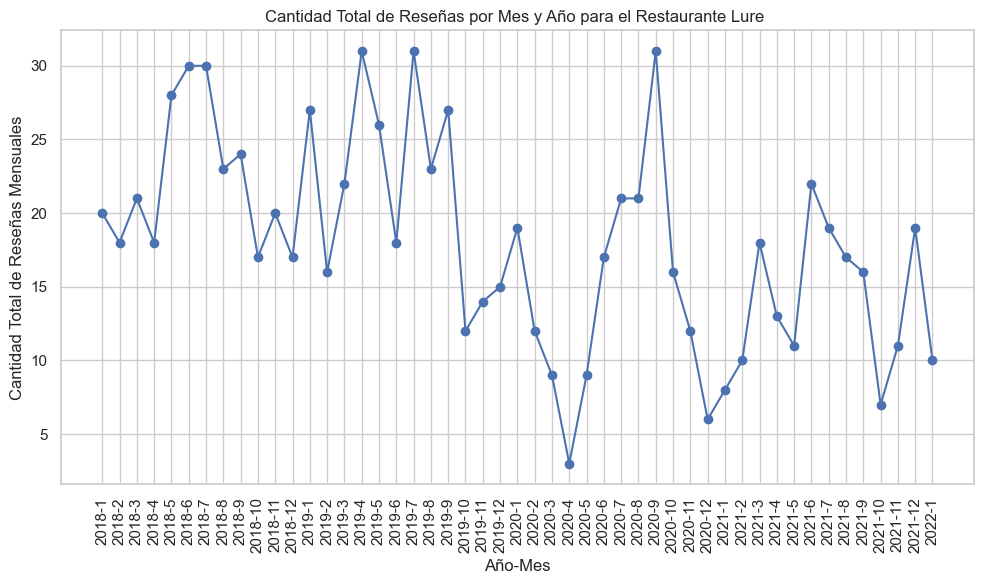

In [208]:
# Filtrar por el business_id del restaurante deseado
restaurant_id = "3Wy21heeDm8h2tSZfcj6OA"
restaurant_reviews = yelp_reviews[yelp_reviews['business_id'] == restaurant_id]

# Calcular la cantidad total de reseñas por mes y año para el restaurante específico
total_reviews_per_month = restaurant_reviews.groupby(['year', 'month'])['review_id'].count()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(total_reviews_per_month.index.map(lambda x: f"{x[0]}-{x[1]}"), total_reviews_per_month.values, marker='o')

plt.title('Cantidad Total de Reseñas por Mes y Año para el Restaurante Lure ')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad Total de Reseñas Mensuales')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


De lo anterior:
* Nuestro cliente tuvo sus puntos más altos de reseñas en abril y julio del 2019, y en setiembre del 2020 (un mes de pandemia, lo cual puede sugerir que fue muy activo en el servicio de delivery). 
* Sus puntos más bajos fueron abril del 2020 (casi inicio de la pandemia), diciembre del 2020, y octubre del 2021. 
* En general, nuestro cliente ha superado apenas las 30 reviews por mes en los último cuatro años.
* Además, se intuye que el comportamiento de la cantidad de reseñas suele ser constante (en algunos meses como enero suele ser más bajo y en julio suele subir) , a excepción del periodo de pandemia.

### Revisamos el comportamiento de los comentarios negativos:

Filtramos por restaurantes marinos:

In [209]:
seafood_restaurants = yelp_restaurants[yelp_restaurants['categories'].apply(lambda x: 'Seafood' in x)]

lista_id_rest= list(seafood_restaurants['business_id'])
seafood_reviews = yelp_reviews[yelp_reviews['business_id'].isin(lista_id_rest)]
seafood_reviews.head(2)


,review_id,user_id,business_id,stars,text,date,year,month
1,LnKr0hwejzl71QmoQyTRDQ,7RU_xK1tEGlUvXfe0GvtEg,hAmuto6UndVroyd_DaD-TA,5,Not sure why it took until now for us to find ...,2018-03-04,2018,3
3,vqmhsvXK9z4TTvnVDNpPDQ,ziNigH8BY9gRDvrmSsJTOw,ICqgjbOpBD9SUtE5PQC9sA,5,"Fun, no-frills atmosphere, right on the water,...",2018-02-23,2018,2


In [210]:
# Filtro por reviews de 1 o 2 estrellas:
seafood_bad_reviews= seafood_reviews[seafood_reviews['stars'].isin([1,2])]
seafood_bad_reviews.head(2)

,review_id,user_id,business_id,stars,text,date,year,month
24,HpRnIREsKOfwM1tqDDaz6A,oXi09pKvHJtd4SZPKiNZlg,encfXG_jrG1M6gX1IqrHrw,1,"This place is terrible. Terrible service, terr...",2018-08-23,2018,8
73,Y_M_U4zk4uexzDmQJsPHpA,HZ6bwFuPs1apPpuc48R1AA,L-YdO_NODKXXT3bkS0nUpg,2,Thought that perhaps this would be an excellen...,2018-05-19,2018,5


Graficamos la cantidad de reseñas malas de nuestro cliente:

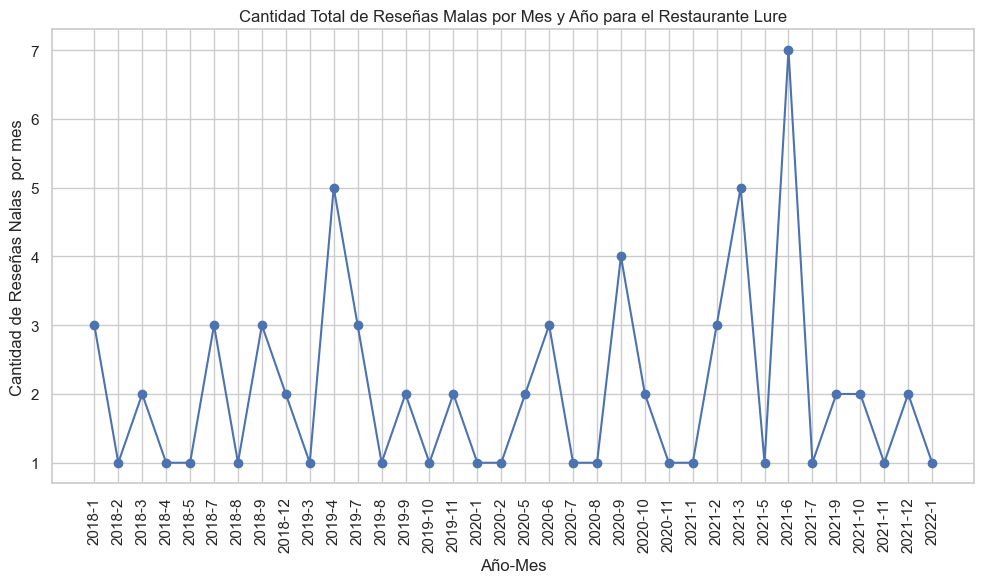

In [211]:
# Filtrar por el business_id del restaurante deseado
restaurant_id = "3Wy21heeDm8h2tSZfcj6OA"
cliente_bad_reviews = seafood_bad_reviews[seafood_bad_reviews['business_id'] == restaurant_id]

# Calcular la cantidad total de reseñas por mes y año para el restaurante específico
total_reviews_per_month = cliente_bad_reviews.groupby(['year', 'month'])['review_id'].count()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(total_reviews_per_month.index.map(lambda x: f"{x[0]}-{x[1]}"), total_reviews_per_month.values, marker='o')

plt.title('Cantidad Total de Reseñas Malas por Mes y Año para el Restaurante Lure')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Reseñas Nalas  por mes')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Conviene más revisar el porcentaje de reseñas malas de nuestro cliente que la cantidad:

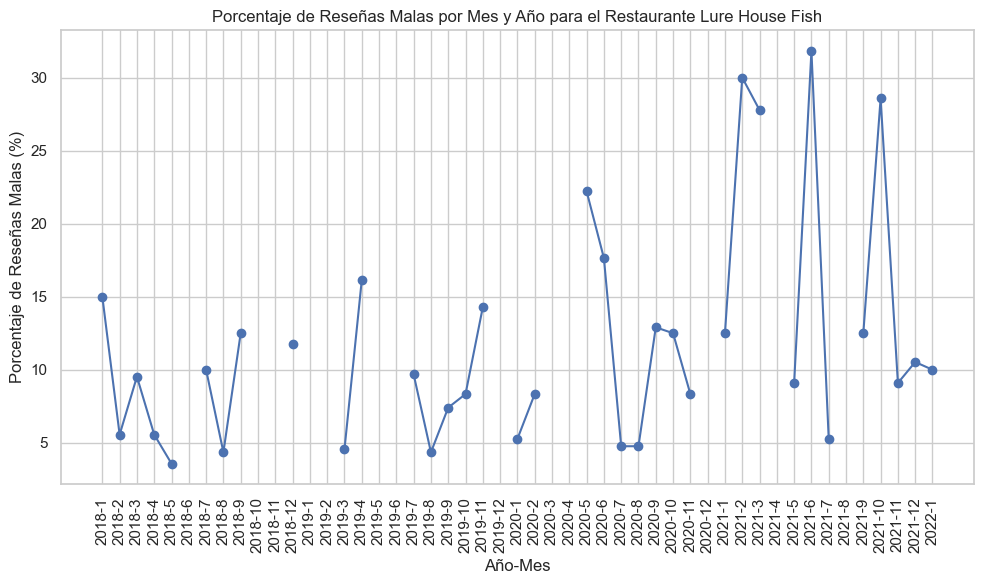

In [212]:
# Filtrar por el business_id del restaurante deseado
restaurant_id = "3Wy21heeDm8h2tSZfcj6OA"
restaurant_reviews = yelp_reviews[yelp_reviews['business_id'] == restaurant_id]

# Calcular el porcentaje de reseñas buenas (3, 4 y 5 estrellas) por mes y año
badd_reviews_per_month = restaurant_reviews[restaurant_reviews['stars'] <=2].groupby(['year', 'month'])['review_id'].count()
total_reviews_per_month = restaurant_reviews.groupby(['year', 'month'])['review_id'].count()
percentage_good_reviews_per_month = (badd_reviews_per_month / total_reviews_per_month) * 100

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(percentage_good_reviews_per_month.index.map(lambda x: f"{x[0]}-{x[1]}"), percentage_good_reviews_per_month.values, marker='o')

plt.title('Porcentaje de Reseñas Malas por Mes y Año para el Restaurante Lure House Fish')
plt.xlabel('Año-Mes')
plt.ylabel('Porcentaje de Reseñas Malas (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

De lo anterior se desprende que:
* Las reseñas malas de nuestro cliente representa un porcentaje bajo del total: su máximo porcentaje ha sido del 30%, casi siempre se ha mantenido alrededor del 15% y actualmente es tan solo el 10%.
* Hay meses en los que no hubo calificaciones malas (0%).
* Volvamos al gráfico que refleja la cantidad de reseñas por mes:

Graficamos la evolución de cantidad de reseñas por mes de solo los restaurantes marinos y lo comparamos con la de nuestro cliente:

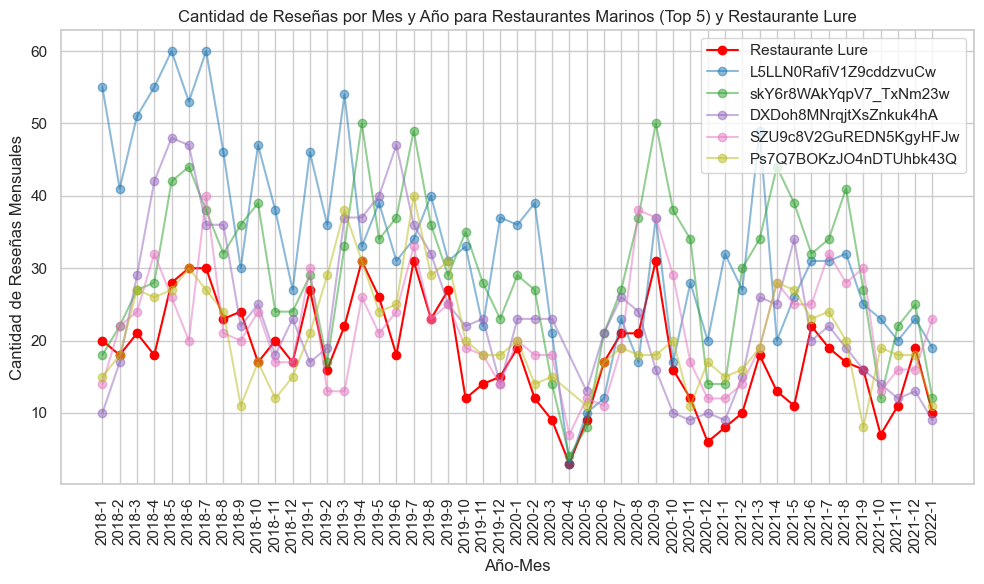

In [213]:
# Filtrar por el business_id del restaurante deseado
restaurant_id = "3Wy21heeDm8h2tSZfcj6OA"
restaurant_reviews = yelp_reviews[yelp_reviews['business_id'] == restaurant_id]

# Calcular la cantidad total de reseñas por mes y año para el restaurante específico
total_reviews_per_month_restaurant = restaurant_reviews.groupby(['year', 'month'])['review_id'].count()

# 1. Calcular la cantidad total de reseñas malas por mes y año para cada restaurante
total_reviews_per_month_bad = seafood_reviews.groupby(['business_id', 'year', 'month'])['review_id'].count()

# 2. Ordenar los negocios por cantidad total de reseñas en orden descendente
top_restaurants_bad = total_reviews_per_month_bad.groupby('business_id').sum().nlargest(5).index

# 3. Filtrar los datos para incluir solo los 5 primeros negocios
filtered_reviews_bad = total_reviews_per_month_bad.loc[top_restaurants_bad]

# Crear el gráfico de líneas combinado
plt.figure(figsize=(10, 6))

# Gráfico 1: Cantidad total de reseñas por mes y año para el restaurante deseado
plt.plot(total_reviews_per_month_restaurant.index.map(lambda x: f"{x[0]}-{x[1]}"), total_reviews_per_month_restaurant.values, marker='o', color='red', label='Restaurante Lure')

# Gráfico 2: Cantidad mensual de reseñas por mes y año para los restaurantes marinos (Top 5)
color_map = plt.get_cmap('tab10')  # Cambiar la paleta de colores a 'tab10'
for i, restaurant_id in enumerate(filtered_reviews_bad.index.get_level_values('business_id').unique()):
    data = filtered_reviews_bad[restaurant_id]
    x_labels = data.index.get_level_values('year').map(str) + '-' + data.index.get_level_values('month').map(str)
    alpha = 0.5 # Ajustar el valor de alpha para hacer los colores más tenues
    plt.plot(x_labels, data.values, marker='o', label=restaurant_id, color=color_map(i / len(filtered_reviews_bad.index.get_level_values('business_id').unique())), alpha = alpha)

plt.title('Cantidad de Reseñas por Mes y Año para Restaurantes Marinos (Top 5) y Restaurante Lure')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Reseñas Mensuales')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




### Análisis:
Del gráfico anterior se desprende que:
* Nuestro clliente se ha encontrado entre el puesto 4 o 5 de restaurantes marinos con más reseñas por mes.
* La cantidad máxima a la que ha llegado ha sido de 30, mientras que la cantidad máxima del top 1 ha sido del doble, 60.
* Actualmente, nuestro cliente se encuentra al nivel de los últimos puestos del top 5, teniendo menos del 50% de cantidad de reviews respecto al restaurante que tiene más reviews (Lure tiene 10, y el primer puesto actual tiene 24 aproximadamente).
* Actualmente, todos los restaurantes del top 5 han disminuido su cantidad de reseñas respecto a la evolución general.

La cantidad máxima alcanzada de reviews de nuestro cliente ha sido 30 , disminuyendo en el periodo de pandemia con un crecimiento lento e irregular después de este periodo. Actualmente, tiene menos del 50% de su punto máixmo alcanzado. Debido a esto, es conveniente poner el foco en aumentar la cantidad actual para que vuelva a llegar a 30, ya que esta sería una cantidad óptima a partir de la cual seguir creciendo.

### 1er KPI : Cantidad de reseñas
* Aumentar en 66 puntos porcentuales la tasa de nivel óptimo de reseñas, en el próximo trimestre.
* Métrica: cantidad de reseñas del mes actual sobre cantidad máxima de reseñas alcanzadas en un mes.
* Objetivo: 30 reseñas mensuales en los próximos tres meses. 

_____________________________________________________________________________________

### Ahora, revisamos la evolución de retención de clientes por mes y año de Lure Fish House: 

In [ ]:
# Restaurante específico
restaurant_id = "3Wy21heeDm8h2tSZfcj6OA"

# Filtrar las reseñas solo para el restaurante específico
restaurant_reviews = yelp_reviews[yelp_reviews['business_id'] == restaurant_id]

# Calcular la cantidad de usuarios repetidos por año
users_repeated_per_year = restaurant_reviews.groupby('year')['user_id'].apply(lambda x: (x.duplicated() | x.duplicated(keep='last')).sum())

# Agregar las columnas 'usuarios_por_año', 'usuarios_repetidos' y 'tasa_retención_por_año'
restaurant_reviews['usuarios_por_año'] = restaurant_reviews.groupby('year')['user_id'].transform('nunique')
restaurant_reviews['usuarios_repetidos'] = restaurant_reviews['year'].map(users_repeated_per_year)
restaurant_reviews['tasa_retención_por_año'] = restaurant_reviews['usuarios_repetidos'] / restaurant_reviews['usuarios_por_año']

#restaurant_reviews.head(2)

# Seleccionar las columnas necesarias
retention_rate = restaurant_reviews[['business_id', 'year', 'usuarios_por_año', 'usuarios_repetidos', 'tasa_retención_por_año']]

# Eliminar duplicados
retention_rate = retention_rate.drop_duplicates()

# Mostrar el DataFrame resultante
retention_rate



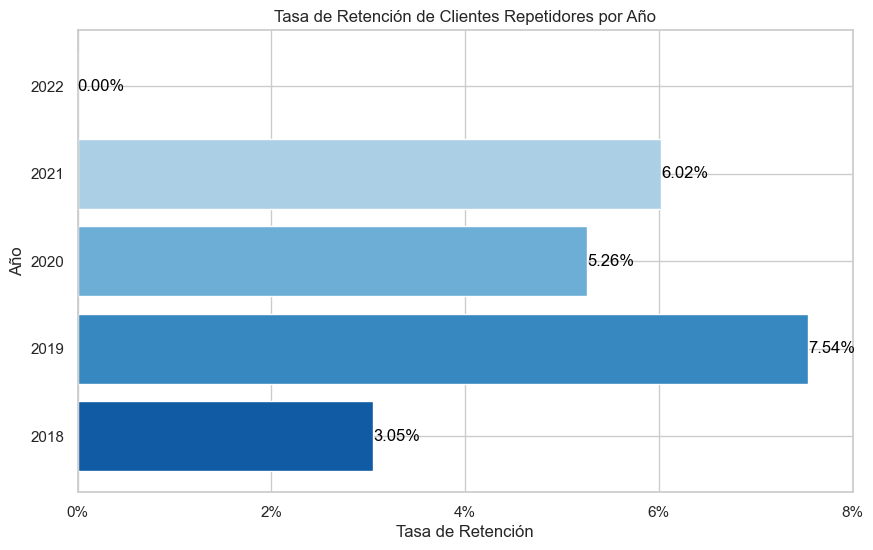

In [214]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))

# Ajustar los tonos de azul en función de la tasa de retención
palette = sns.color_palette("Blues_r", n_colors=len(retention_rate))

bars = plt.barh(retention_rate['year'], retention_rate['tasa_retención_por_año'], color=palette)

# Agregar etiquetas a las barras
for bar, rate in zip(bars, retention_rate['tasa_retención_por_año']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{rate:.2%}', va='center', color='black')

plt.xlabel('Tasa de Retención')
plt.ylabel('Año')
plt.title('Tasa de Retención de Clientes Repetidores por Año')
plt.xlim(0, 0.08)  # Establecer límites para el eje x (porcentajes)
plt.xticks([0, 0.02, 0.04, 0.06, 0.08], ['0%', '2%', '4%', '6%', '8%'])
plt.grid(True)
plt.show()



Promedio de tasa de retención:

In [ ]:
retention_rate.tasa_retención_por_año.mean()

### 2do KPI : Tasa de retención de clientes:
* Aumentar en 4 puntos porcentuales la tasa de retención de clientes en el próximo año.
* Métrica: cantidad de clientes anual que comentaron más de una vez / cantidad total anual de clientes que comentaron .
* Objetivo: 10% en el 2022. 

____________________________________________________________________________________________________

### Revisamos ahora las reviews relacionadas al servicio:

In [ ]:
print(restaurant_reviews.info())
restaurant_reviews.head(2)


Generamos un wordcloud panorámico de las reviews a Lure Fish House:

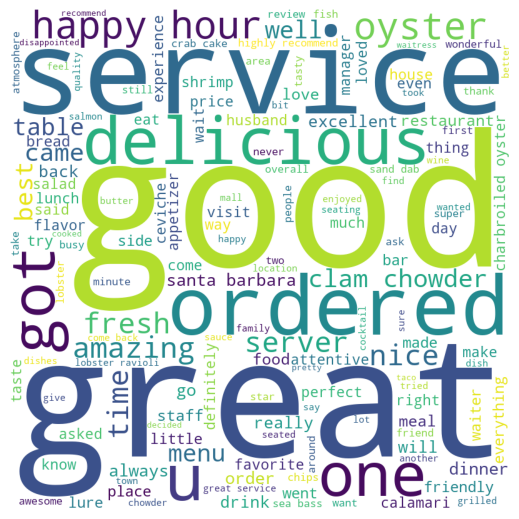

In [215]:
# Columna a partir de la cual se generará el wordcloud:
columna = restaurant_reviews['text']

# Un conjunto de palabras a excluir
palabras_a_excluir = {'restaurant', 'seafood', 'food', 'lure', 'review', 'place', 'fish'}

# Filtrar y unir las palabras en un solo texto
palabras_filtradas = ' '.join(word for line in columna for word in line.lower().split() if word.lower() not in palabras_a_excluir)

# Crear el wordcloud:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(palabras_filtradas)

# Graficar el wordcloud:
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

De lo anterior, se desprende que:
* En general, los clientes suelen estar satisfechos con su experiencia en Lure Fish House y con los platos ofrecidos, ya que las palabras *delocious*, *great*, *amazing*, *nice* tienen mayor tamaño. 
* A pesar de esto, conviene ser más específico y revisar qué dicen los clientes respecto al servicio ofrecido.

Creo un nuevo dataframe con las reviews hechas al restaurante "Lure Fish House" que estén relacionadas al servicio de los meseros:

In [ ]:
# Palabras clave relacionadas con la velocidad de atención
keywords = ['service', 'waiter'] #'back']

# Filtrar comentarios para el restaurante "Lure House Fish" y con palabras clave de velocidad
service_reviews = restaurant_reviews[restaurant_reviews['text'].str.contains('|'.join(keywords), case=False)]

# Mostrar el nuevo dataframe filtrado
service_reviews


Filtro por los que tienen 1, 2 o 3 estrellas:

In [ ]:
service_bad_reviews= service_reviews[service_reviews['stars']<=3]
service_bad_reviews.shape

Genero el wordcloud del dataframe service_bad_reviews a partir de su columna "text":


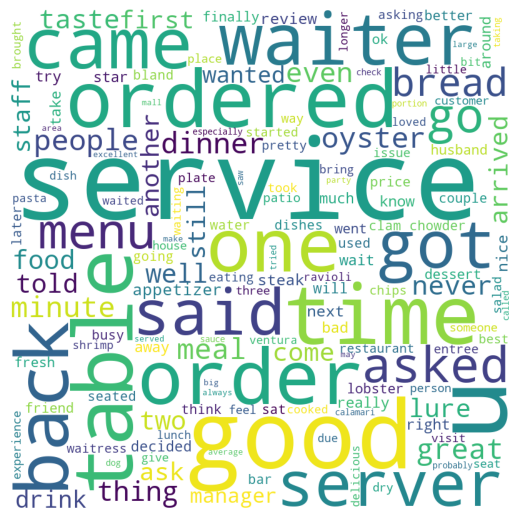

In [216]:
# Columna a partir de la cual se generará el wordcloud:
columna = service_bad_reviews['text']

# Un conjunto de palabras a excluir
palabras_a_excluir = {'restaurant', 'seafood', 'food', 'lure', 'review', 'place', 'fish'}

# Filtrar y unir las palabras en un solo texto
palabras_filtradas = ' '.join(word for line in columna for word in line.lower().split() if word.lower() not in palabras_a_excluir)

# Crear el wordcloud:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(palabras_filtradas)

# Graficar el wordcloud:
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [217]:
# Calculo el porcentaje de comentarios malos respecto al servicio:
cant_service_reviews= service_reviews.shape[0]
cant_bad_service_reviews= service_bad_reviews.shape[0]
porcentaje= round((cant_bad_service_reviews/cant_service_reviews)*100,2)

# Porcentaje:
f'El porcentaje de comentarios totales malos sobre el servicio es {porcentaje}%'


'El porcentaje de comentarios totales malos sobre el servicio es 15.99%'

De lo anterior, se desprende que:
* En general, los clientes suelen estar satisfechos con su experiencia en Lure Fish House y con los platos ofrecidos.
* Más del 80% de comentarios relacionados a la atención de los meseros son buenos, teniendo 4 o 5 estrellas.
* Sin embargo, el 16% de comentarios totales respecto al servicio son o neutros o negativos (de 1 a 3 estrellas). Esto muestra que hay un aspecto importante que mejorar relacionado a la atención de los meseros y al tiempo, ya que las palabras *service*, *server*, *waiter*, *table*, *order*, *time* y *minute* destacan en el wordcloud. Además, esto puede tener que ver con la decisión de retorno al restaurante , puesto que las palabras *back* y*never* también tienen una presencia importante.
* Conviene ver la evolución porcentual por trimestre de comentarios malos respecto al servicio:

Creamos un dataframe con columnas indicadoras para los comentarios de servicio y de estos, cuáles son malos:

In [218]:
# Palabras clave para verificar la presencia de servicio en el texto
service_keywords = ['service', 'waiter']

# Agregar columna "service" usando str.contains()
restaurant_reviews['service'] = restaurant_reviews['text'].str.contains('|'.join(service_keywords), case=False)

# Convertir los valores booleanos en "yes" y "no"
restaurant_reviews['service'] = restaurant_reviews['service'].apply(lambda x: 'yes' if x else 'no')

# Agregar columna "bad_service" usando una condicional directamente
restaurant_reviews['bad_service'] = (restaurant_reviews['service'] == 'yes') & (restaurant_reviews['stars'].isin([1, 2, 3]))

# Convertir los valores booleanos en "yes" y "no"
restaurant_reviews['bad_service'] = restaurant_reviews['bad_service'].apply(lambda x: 'yes' if x else 'no')

# Mostrar el dataframe con las nuevas columnas
restaurant_reviews.head(3)



,review_id,user_id,business_id,stars,text,date,year,month,service,bad_service
253759,yyBVh6lopJKmrZ6MeAY8iw,G4EWoWzp-tl_8T8EQ3D7jQ,3Wy21heeDm8h2tSZfcj6OA,5,I read the reviews about this place and was ex...,2018-10-03,2018,10,yes,no
253799,PeoLbEArpm071baSAHuG7A,8wKNF-EroVDX8d_NvQTynQ,3Wy21heeDm8h2tSZfcj6OA,5,Great customer service ever!!!! Emily is so lo...,2018-05-29,2018,5,yes,no
253829,K12aP7Jd7r93OcsVbJ6LBw,m5Dru9MzgjbBKQMaD3gExQ,3Wy21heeDm8h2tSZfcj6OA,5,Went to SB Lure fish house and was more than i...,2018-05-19,2018,5,yes,no


Creamos un dataframe que contenga la información relevante por año y trimestre:

In [219]:
# Calcular el trimestre a partir de la columna "date"
restaurant_reviews['quarter'] = restaurant_reviews['date'].dt.to_period('Q')

# Calcular el total de comentarios y el total de comentarios malos por trimestre y año
bad_service_percentage = restaurant_reviews.groupby(['year', 'quarter'])[['service', 'bad_service']].apply(lambda x: (x == 'yes').sum())

# Calcular el porcentaje de comentarios malos respecto al servicio
bad_service_percentage['percentage_bad_service'] = bad_service_percentage['bad_service'] / bad_service_percentage['service'] * 100

# Reiniciar el índice para que 'year', 'quarter' sean columnas
bad_service_percentage.reset_index(inplace=True)

bad_service_percentage

,year,quarter,service,bad_service,percentage_bad_service
0,2018,2018Q1,30,4,13.333333
1,2018,2018Q2,43,4,9.302326
2,2018,2018Q3,45,7,15.555556
3,2018,2018Q4,28,2,7.142857
4,2019,2019Q1,41,6,14.634146
5,2019,2019Q2,39,8,20.512821
6,2019,2019Q3,46,5,10.869565
7,2019,2019Q4,18,2,11.111111
8,2020,2020Q1,18,0,0.000000
9,2020,2020Q2,11,3,27.272727


Ahora, creamos un gráfico que represente la evolución porcentual de comentarios malos respecto al servicio por trimestre:

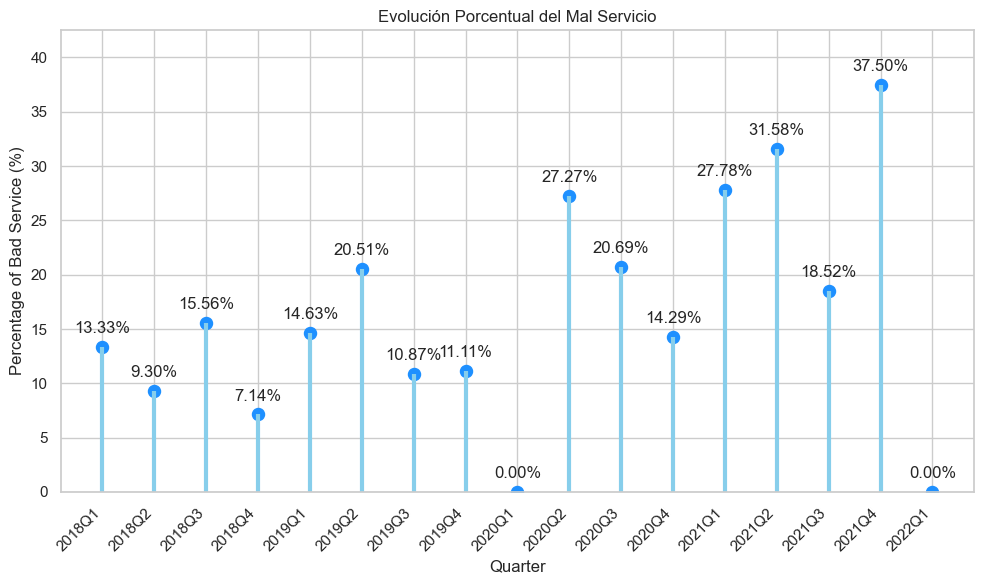

In [220]:
# Convertir la columna 'quarter' a una lista de etiquetas
quarter_labels = [str(q) for q in bad_service_percentage['quarter']]
percentages = bad_service_percentage['percentage_bad_service']

fig, ax = plt.subplots(figsize=(10, 6))

ax.vlines(quarter_labels, ymin=0, ymax=percentages, color='skyblue', linewidth=3)
ax.scatter(quarter_labels, percentages, color='dodgerblue', s=75)

ax.set_xlabel('Quarter')
ax.set_ylabel('Percentage of Bad Service (%)')  # Agrega el símbolo de porcentaje
ax.set_title('Evolución Porcentual del Mal Servicio')
ax.set_xticks(quarter_labels)
ax.set_xticklabels(quarter_labels, rotation=45, ha='right')

# Agrega los valores de porcentaje en los puntos del gráfico
for i, txt in enumerate(percentages):
    ax.annotate(f'{txt:.2f}%', (quarter_labels[i], percentages[i]), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_ylim(0, max(percentages) + 5)

plt.tight_layout()
plt.show()




### Análisis:
De lo anterior, se desprende que:
* En el periodo 2020-Q1, de los18 comentarios sobre el servicio ninguno fue malo.
* El mayor porcentaje de comentarios malos ha sido recientemente, en el periodo 2021-Q4: casi 38%.
* El mejor porcentaje , a parte del 0%, se dio en el periodo 2018-Q4 con aproximadamente 7%.
* Conviene reudcir el porcentaje actual al finalizar el periodo 2022-Q1 a 7%, es decir 30 puntos porcentuales.

### 3er KPI : Insatisfacción del cliente respecto al servicio
* Reducir en 30 puntos porcentuales la tasa de insatisfacción del cliente respecto al servicio, en el próximo trimestre.
* Métrica: cantidad de comentarios negativos respecto al servicio sobre cantidad de comentarios totales respecto al servicio.
* Objetivo: 7% en el próximo trimestre (2022-Q1).



____________________________________________________________________________________________________________

### Revisamos ahora las reviews de los usuarios elite 

Los usuarios elite tienen mayor confiabilidad para los usuarios en general de Yelp, ya que sus comentarios son objetivos. Además, suelen compartir fotos de calidad de los restaurantes que visitan. Por estos motivos, conviene poner el foco en el aumento de las reviews hechas por estos usuarios, ya que proporcionan prestigio en la plataforma y publicidad gratuita.

Filtramos los comentarios realizados por usuarios que fueron elite a partir del 2018:

In [221]:
# Convertir la columna 'date' a tipo de dato datetime
restaurant_reviews['date'] = pd.to_datetime(restaurant_reviews['date'])

# Obtener los usuarios elite con años a partir de 2018, también se filtran aquellos usuarios que han realizado reseñas en el restaurante específico.
elite_users_in_restaurant = yelp_users[
    (yelp_users['elite'].str.contains(r'\b(?:2018|2019|2020|2021|2022)\b', na=False)) & 
    (yelp_users['user_id'].isin(restaurant_reviews['user_id']))
]

# Se filtran las reseñas del restaurante específico solo para los usuarios "elite" obtenidos anteriormente.
restaurant_reviews_elite = restaurant_reviews[restaurant_reviews['user_id'].isin(elite_users_in_restaurant['user_id'])]

In [222]:
print(f"Cantidad de usuarios elite que dieron mínimo 4 estrellas: {len(restaurant_reviews_elite[(restaurant_reviews_elite['stars'] >= 4)])}")
print(f"Cantidad de usuarios elite que dieron 3 estrellas o menos: {len(restaurant_reviews_elite[(restaurant_reviews_elite['stars'] < 4)])}")

Cantidad de usuarios elite que dieron mínimo 4 estrellas: 128
Cantidad de usuarios elite que dieron 3 estrellas o menos: 25


De lo anterior, la cantidad total de todos los años (contando desde el 2018) de reviews negativas de parte de usuarios elite es de aproximadamente el 15% del total, lo que quiere decir que hay una preponderancia de buenas reviews de parte de usuarios elite.

Debido a lo anterior, conviene centrarnos en aumenta la cantidad total de reviews de usuarios elite en general:

In [223]:
# Se crea un diccionario donde los usuarios "elite" se mapean a sus respectivos valores en la columna "elite".
elite_mapping = elite_users_in_restaurant.set_index('user_id')['elite'].to_dict()

# Agregar la columna 'elite' correspondiente a los usuarios elite, usando el diccionario de mapeo para asignar los valores correspondientes.
restaurant_reviews_elite['elite'] = restaurant_reviews_elite['user_id'].map(elite_mapping)

# Corregir los valores problemáticos en la columna 'elite' (ejemplo, '20,20' a '2020')
restaurant_reviews_elite['elite'] = restaurant_reviews_elite['elite'].str.replace(r'\b20,20\b', '2020', regex=True)

# Convertir la columna 'date' a tipo de dato datetime
restaurant_reviews_elite['date'] = pd.to_datetime(restaurant_reviews_elite['date'])

# Crear una lista de años únicos en las reseñas
unique_years = restaurant_reviews_elite['date'].dt.year.unique()

# Crear una Lista para almacenar los resultados
result_data = []

# Iterar a través de los años únicos y calcular la cantidad de usuarios elite por trimestre
for year in unique_years:
    for quarter in range(1, 5):  # Iterar por los 4 trimestres
        elite_users_count = len(restaurant_reviews_elite[
            (restaurant_reviews_elite['elite'].str.contains(rf'\b{year}\b', na=False)) &
            (restaurant_reviews_elite['date'].dt.year == year) &
            (restaurant_reviews_elite['date'].dt.quarter == quarter)
        ])
        
        total_users_count = len(restaurant_reviews[
             (restaurant_reviews['date'].dt.year == year) &
             (restaurant_reviews['date'].dt.quarter == quarter)
        ]['user_id'].unique())
        
        # total_users_count = len(restaurant_reviews['user_id'].unique())

        
        if total_users_count == 0:
            elite_percentage = 0
        else:
            elite_percentage = elite_users_count / total_users_count
        
        result_data.append({
            'business_id': restaurant_id,
            'year': year,
            'trimester': quarter,
            'elite_users_count': elite_users_count,
            'total_users_count': total_users_count,
            'elite_percentage': elite_percentage * 100
        })

# Crear el DataFrame final
elite_reviews_por_trimestre = pd.DataFrame(result_data)

# Mostrar el DataFrame resultante
elite_reviews_por_trimestre

,business_id,year,trimester,elite_users_count,total_users_count,elite_percentage
0,Ps7Q7BOKzJO4nDTUhbk43Q,2018,1,9,59,15.254237
1,Ps7Q7BOKzJO4nDTUhbk43Q,2018,2,8,76,10.526316
2,Ps7Q7BOKzJO4nDTUhbk43Q,2018,3,6,74,8.108108
3,Ps7Q7BOKzJO4nDTUhbk43Q,2018,4,4,54,7.407407
4,Ps7Q7BOKzJO4nDTUhbk43Q,2019,1,7,64,10.937500
5,Ps7Q7BOKzJO4nDTUhbk43Q,2019,2,11,72,15.277778
6,Ps7Q7BOKzJO4nDTUhbk43Q,2019,3,10,79,12.658228
7,Ps7Q7BOKzJO4nDTUhbk43Q,2019,4,3,39,7.692308
8,Ps7Q7BOKzJO4nDTUhbk43Q,2020,1,3,40,7.500000
9,Ps7Q7BOKzJO4nDTUhbk43Q,2020,2,3,27,11.111111


Graficamos la evolución porcentual de usuarios elite de "Lure Fish House" por año y trimestre:

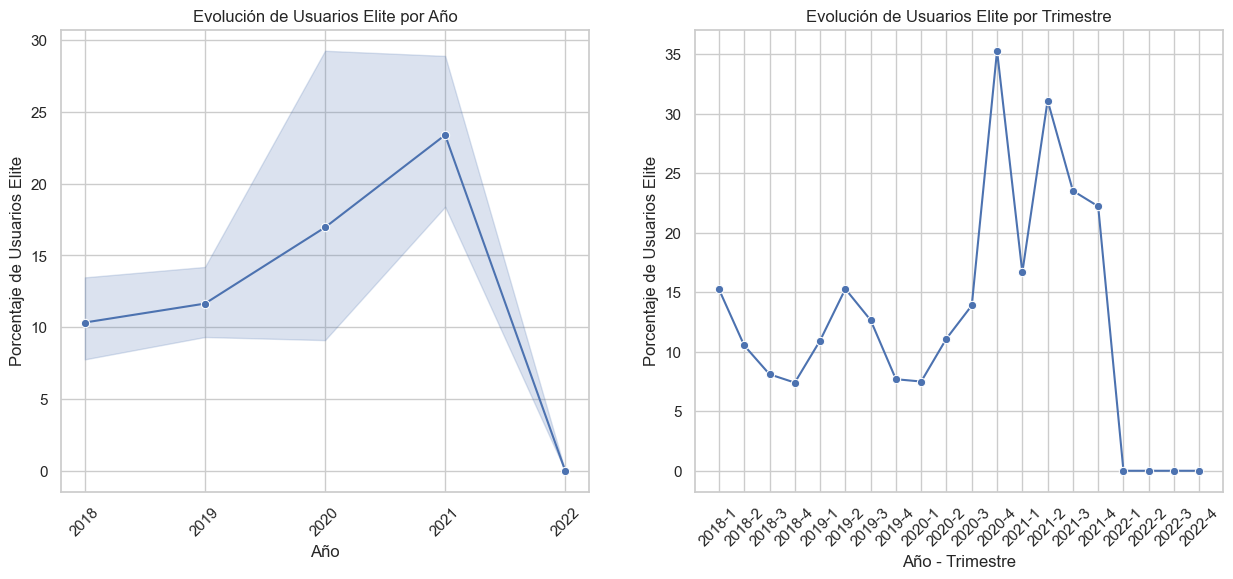

In [224]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura con una fila y dos columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Ajustar el espacio horizontal entre los gráficos
plt.subplots_adjust(wspace=0.2)

# Primer gráfico en la primera columna
sns.lineplot(data=elite_reviews_por_trimestre, x="year", y="elite_percentage", marker="o", ax=axes[0])

# Configurar las etiquetas de los ejes y el título del primer gráfico
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Porcentaje de Usuarios Elite")
axes[0].set_title("Evolución de Usuarios Elite por Año")
axes[0].set_xticks(elite_reviews_por_trimestre['year'].unique())
axes[0].set_xticklabels(elite_reviews_por_trimestre['year'].unique(), rotation=45)
axes[0].grid(True)

# Segundo gráfico en la segunda columna
elite_reviews_por_trimestre['year_trimester'] = elite_reviews_por_trimestre['year'].astype(str) + '-' + elite_reviews_por_trimestre['trimester'].astype(str)
sns.lineplot(data=elite_reviews_por_trimestre, x='year_trimester', y='elite_percentage', marker="o", ax=axes[1])

# Configurar las etiquetas de los ejes y el título del segundo gráfico
axes[1].set_xlabel("Año - Trimestre")
axes[1].set_ylabel("Porcentaje de Usuarios Elite")
axes[1].set_title("Evolución de Usuarios Elite por Trimestre")
axes[1].set_xticklabels(elite_reviews_por_trimestre['year_trimester'], rotation=45)
axes[1].grid(True)

# Mostrar la figura con los dos gráficos
plt.show()

### Análisis:
* El porcentaje más alto de usuarios elite corresponde al periodo 2020-Q4, con 35%, y el más bajo al periodo 2018 -Q4 y 2020-Q1, con 7%.
* Observando la evolución por año y sin contar el año 2022 (ya que no se tiene información sino solo hasta el primer mes), vemos que hay una tendencia al alza. Al observar más detalladamente los últimos periodos, a partir del periodo 2021-Q2 se aprecia un descenso.
* Ya que hay el mayor incremento porcentual que se dio fue de 22 puntos porcentuales (del periodo 2020-Q3 al 2020-Q4), es realista proponernos superar el punto máximo , 35%, ya que el incremento sería un poco más de 13 puntos porcentuales (menos que el incremento máximo de 22).

### 4to KPI: Tasa de usuarios elite
* Aumentar en 18% la tasa de reseñas de usuarios elite en el próximo trimestre.
* Métrica: cantidad de reseñas  de usuarios elite sobre la cantidad de reseñas  totales por trimestre.
* Objetivo: 40% al finalizar el periodo 2022-Q1.
_______________________________________________________________________________________________________________________________

### Ahora revisamos los clientes de comida mexicana

Primero, calculamos el porcentaje de usuarios que consumen comida mexicana respecto al total de usuarios que comentaron en yelp en los últimos 4 años:

In [225]:
#__ General

# Filtrar por categorías relacionadas con "mexican food"
mexican_food_keywords = ['mexican food', 'taco', 'burrito', 'nachos', 'tex-mex', 'enchilada', 'salsa', 'mexico', 'mexican', 'tacos']

# Aplicar el filtro a los restaurantes
filtered_mexican_restaurants = yelp_restaurants[yelp_restaurants['categories'].apply(lambda x: any(keyword in x.lower() for keyword in mexican_food_keywords))]

# Crear una lista de identificadores únicos de negocios de comida mexicana
lista_mexicans = list(filtered_mexican_restaurants.business_id.unique())

# Filtrar las reseñas de yelp para incluir solo aquellas relacionadas con restaurantes de comida mexicana
reviews_mexican_food = yelp_reviews[yelp_reviews.business_id.isin(lista_mexicans)]

print(f'{len(reviews_mexican_food.user_id.unique())} usuarios consumen comida mexicana')
# 42500 usuarios de yelp consumen comida mexicana 

print(f'{len(yelp_reviews.user_id.unique())} usuarios totales unicos de yelp')
# 223490 usuarios totales unicos de yelp

print(f'Equivale al {len(reviews_mexican_food.user_id.unique())/len(yelp_reviews.user_id.unique())}%')
# 223490 usuarios totales unicos de yelp

# Crear una lista de identificadores únicos de usuarios que han realizado reseñas en restaurantes de comida mexicana
lista_mexican_users = list(reviews_mexican_food.user_id.unique())



42500 usuarios consumen comida mexicana
223490 usuarios totales unicos de yelp
Equivale al 0.1901651080585261%


Ahora, calculamos cuántos de esos usuarios que consumen comida mexicana son clientes nuestros a partir de sus reviews:

In [226]:
# __ Lure

# Filtrar las reseñas de los usuarios que han dejado reseñas en restaurantes de comida mexicana y en el restaurante "Lure House Fish"
reviews_lure_mexican_food = restaurant_reviews[restaurant_reviews.user_id.isin(lista_mexican_users)]

print(f'{len(reviews_lure_mexican_food.user_id.unique())} usuarios de Lure que consumen comida mexicana')
# 239 usuarios de Lure que consumen comida mexicana

print(f'{len(restaurant_reviews.user_id.unique())} usuarios de Lure totales')
# 845 usuarios de Lure totales

print(f'En los útimos 4 años, {len(reviews_lure_mexican_food.user_id.unique())/len(restaurant_reviews.user_id.unique())}% de usuarios que consumen comida mexicana son clientes de Lure Fish House.')

239 usuarios de Lure que consumen comida mexicana
845 usuarios de Lure totales
En los útimos 4 años, 0.2828402366863905% de usuarios que consumen comida mexicana son clientes de Lure Fish House.


Calculamos el porcentaje de usuarios que consumen comida mexicana respecto al total de usuarios por año:

In [227]:
# Convertir la columna 'date' a tipo de dato datetime
yelp_reviews['date'] = pd.to_datetime(yelp_reviews['date'])
reviews_mexican_food['date'] = pd.to_datetime(reviews_mexican_food['date'])

# Agregar la columna 'year' a los DataFrames
yelp_reviews['year'] = yelp_reviews['date'].dt.year
reviews_mexican_food['year'] = reviews_mexican_food['date'].dt.year

# Obtener el total de usuarios únicos que consumen comida mexicana por año
users_mexican_food = reviews_mexican_food.groupby('year')['user_id'].nunique().reset_index()

# Obtener el total de usuarios únicos en general por año
total_users = yelp_reviews.groupby('year')['user_id'].nunique().reset_index()

# Combinar los DataFrames anteriores para calcular el porcentaje y crear una nueva columna
result = pd.merge(users_mexican_food, total_users, on='year', suffixes=('_mexican', '_total'))
result['mexicans_percentage'] = (result['user_id_mexican'] / result['user_id_total']) * 100

# Seleccionar las columnas deseadas en el DataFrame final
yelp_users_mexican_total = result[['year', 'user_id_mexican', 'user_id_total', 'mexicans_percentage']]

# Mostrar el DataFrame final
yelp_users_mexican_total

,year,user_id_mexican,user_id_total,mexicans_percentage
0,2018,13860,75893,18.262554
1,2019,13195,77570,17.010442
2,2020,9362,55717,16.802771
3,2021,10714,64894,16.510001
4,2022,619,4591,13.482901


Graficamos el dataframe anterior (la evolución porcentual de usuarios que consumen comida mexicana por año):

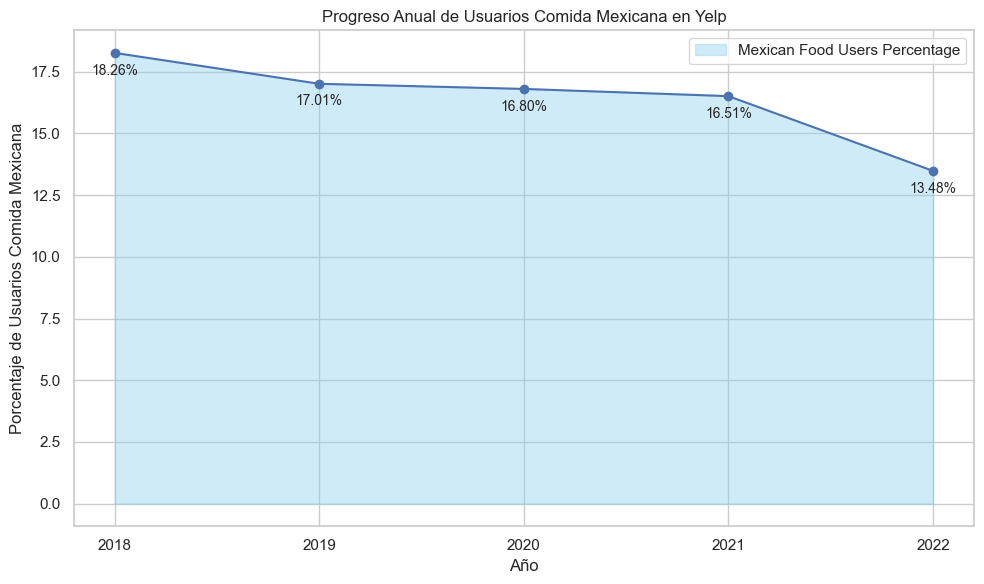

In [228]:
# Datos del DataFrame
years = yelp_users_mexican_total['year']
mexicans_percentage = yelp_users_mexican_total['mexicans_percentage']

# Crear la gráfica de área con puntos
plt.figure(figsize=(10, 6))
plt.fill_between(years, mexicans_percentage, color='skyblue', alpha=0.4, label='Mexican Food Users Percentage')
plt.plot(years, mexicans_percentage, marker='o', color='b')

# Definir el desplazamiento vertical mayor de las etiquetas
label_offset = 1.0

# Agregar etiquetas de porcentaje más abajo de cada punto
for year, percentage in zip(years, mexicans_percentage):
    plt.text(year, percentage - label_offset, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Usuarios Comida Mexicana')
plt.title('Progreso Anual de Usuarios Comida Mexicana en Yelp')
plt.legend()

# Mostrar solo años enteros en el eje x
plt.xticks(years)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Ahora, revisamos la evolución porcentual por año de los usuarios clientes de *Lure Fish House* que consumen comida mexicana:

In [ ]:
# Agregar las columnas de año y trimestre
reviews_lure_mexican_food['year'] = reviews_lure_mexican_food['date'].dt.year
reviews_lure_mexican_food['trimester'] = reviews_lure_mexican_food['date'].dt.quarter

restaurant_reviews['year'] = restaurant_reviews['date'].dt.year
restaurant_reviews['trimester'] = restaurant_reviews['date'].dt.quarter

# Crear un DataFrame con usuarios únicos de comida mexicana en nuestro restaurante por año y trimestre
mexican_users = reviews_lure_mexican_food.groupby(['business_id', 'year', 'trimester'])['user_id'].nunique().reset_index()

# Crear un DataFrame con usuarios únicos totales en nuestro restaurante por año y trimestre
total_users = restaurant_reviews.groupby(['business_id', 'year', 'trimester'])['user_id'].nunique().reset_index()

# Unir los DataFrames
merged_df = mexican_users.merge(total_users, on=['business_id', 'year', 'trimester'], suffixes=('_mexican', '_total'))

# Calcular el porcentaje
merged_df['mexicans_percentage'] = (merged_df['user_id_mexican'] / merged_df['user_id_total']) * 100

# Seleccionar las columnas necesarias
lure_users_mexican_percentage = merged_df[['business_id', 'year', 'trimester', 'user_id_mexican', 'user_id_total', 'mexicans_percentage']]

# Mostrar el DataFrame resultante
lure_users_mexican_percentage

Graficamos el dataframe anterior:

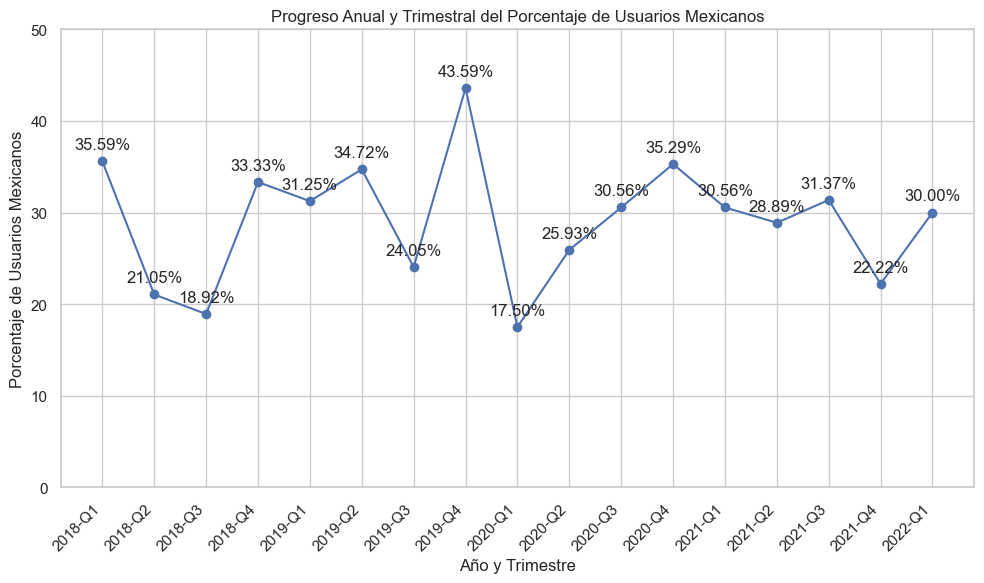

In [229]:
# Grafica del progeso anual y trimestal del porcentaje de usuarios de Lure que consumen comida mexicana

# Crear un índice combinando año y trimestre
lure_users_mexican_percentage['period'] = lure_users_mexican_percentage['year'].astype(str) + '-Q' + lure_users_mexican_percentage['trimester'].astype(str)

# Datos del DataFrame
periods = lure_users_mexican_percentage['period']
mexicans_percentage = lure_users_mexican_percentage['mexicans_percentage']

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(periods, mexicans_percentage, marker='o', linestyle='-', color='b')

# Agregar etiquetas a cada punto con el valor de porcentaje
for period, percentage in zip(periods, mexicans_percentage):
    plt.text(period, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Configurar ejes y etiquetas
plt.xlabel('Año y Trimestre')
plt.ylabel('Porcentaje de Usuarios Mexicanos')
plt.title('Progreso Anual y Trimestral del Porcentaje de Usuarios Mexicanos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor claridad
plt.ylim(0, 50)  # Rango del eje y

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

### Análisis:
* El porcentaje más alto corresponde al periodo 2019-Q4 siendo de 43.59% , y el más bajo al periodo 2020-Q1 siendo de 17.5%.
* El incremento mayor entre un periodo y otro ha sido de casi 20% entre el periodo 2019-Q3 y 2019-Q4. 
* En el último periodo completo (2021-Q4), el porcentaje es de 22.22% , presentado una alza hacia este nuevo periodo incompleto (2022-Q1 , solo enero). 


### 5to KPI: Clientes de comida mexicana:
* Aumentar en 23 puntos porcentuales la tasa de clientes de comida mexicana en el siguiente trimestre.
* Métrica: del total de personas que consumen comida mexicana, cuántos son clientes nuestros.
* Objetivo: 45% al finalizar el próximo trimestres 2022-Q1.

________________________________________________________________________________________________________________________

Ahora, obtengo los usuarios únicos que han comentado en restaurantes de comida mexicana:

In [ ]:
users_mexican_food =reviews_mexican_food.drop_duplicates(subset='user_id')
users_mexican_food

Cantidad de restaurantes de comida mexicana:

In [ ]:
filtered_mexican_restaurants.shape[0]

### Plus: Oferta-Demanda de comida mexicana
* Identificar las ciudades potenciales para la apertura de locales con el nuevo rubro de comida mexicana a partir de la tasa oferta-demanda de ésta: mientras menor sea la tasa, menor es la oferta respecto a la demanda, por lo que indica un sector potencial.
* Métrica: cantidad de restaurantes de comida mexicana sobre cantidad de usuarios únicos que han realizado reviews de comida mexicana, por estado.
* Este análisis se desarrolla directamente en el dashboard por medio de Power Bi.


### Por último, exporto todos aquellos dataframes a utilizar para la realización del dashboard:

In [199]:
# Dataframes a usar:

# KPI 1:
seafood_restaurants.to_csv('DASHBOARD_DATASETS/seafood_restaurants.csv', index=False, encoding='utf-8')
seafood_reviews.to_csv('DASHBOARD_DATASETS/seafood_reviews.csv', index=False, encoding='utf-8')
seafood_bad_reviews.to_csv('DASHBOARD_DATASETS/seafood_bad_reviews.csv', index=False, encoding='utf-8')
restaurant_reviews.to_csv('DASHBOARD_DATASETS/restaurant_reviews.csv', index=False, encoding='utf-8')

# KPI 2:
#restaurant_reviews
retention_rate.to_csv('DASHBOARD_DATASETS/retention_rate.csv', index=False, encoding='utf-8')


# KPI 3:
# restaurant_reviews
service_reviews.to_csv('DASHBOARD_DATASETS/service_reviews.csv', index=False, encoding='utf-8')
service_bad_reviews.to_csv('DASHBOARD_DATASETS/service_bad_reviews.csv', index=False, encoding='utf-8')
bad_service_percentage.to_csv('DASHBOARD_DATASETS/bad_service_percentage.csv', index=False, encoding='utf-8')

# KPI 4:
elite_reviews_por_trimestre.to_csv('DASHBOARD_DATASETS/elite_reviews_por_trimestre.csv', index=False, encoding='utf-8')
restaurant_reviews_elite.to_csv('DASHBOARD_DATASETS/restaurant_reviews_elite.csv', index=False, encoding='utf-8')

# KPI 5:
yelp_users_mexican_total.to_csv('DASHBOARD_DATASETS/yelp_users_mexican_total.csv', index=False, encoding='utf-8')
lure_users_mexican_percentage.to_csv('DASHBOARD_DATASETS/lure_users_mexican_percentage.csv', index=False, encoding='utf-8')

# BONUS:
users_mexican_food.to_csv('DASHBOARD_DATASETS/users_mexican_food.csv', index=False, encoding='utf-8')
filtered_mexican_restaurants.to_csv('DASHBOARD_DATASETS/mexican_restaurants.csv', index=False, encoding='utf-8')